# Exploración de Variables Categóricas y Análisis Multivariable

### OBJETIVO

- Agregar `anotaciones` y `títulos` a las `gráficas` que hemos hecho hasta el momento
- Realizar `gráficas de barras` para explorar la distribución de `variables categóricas`
- Realizar `tablas de contingencia` y `gráficas con múltiples axes` para explorar dos o más variables categóricas

## Carga general de datos

Para explorar nuestras variables categóricas y realizar nuestro análisis multivariable, utilizaremos las siguientes librerias:

**NOTA: Los datasets `PDZona` de cada partícula, fueron re cálculados para este modulo. Los procedimientos los vemos [aquí](https://github.com/IrvingC48/BeduFase3-Proyecto_python/blob/main/Procesos/Calculo_Promedio_Diario_e_Indice_Calidad.ipynb)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Vamos a realizar lo siguiente:

- Cargar los documentos que validaremos, para explorar las variables categóricas

In [2]:
df_PM10 = pd.read_csv('../Datasets/PM10/PDZona_PM10.csv')  #Data PM 10
df_PM25 = pd.read_csv('../Datasets/PM2.5/PDZona_PM25.csv') #Data PM 2.5

## Análisis Multivariable $PM_{10}$

Validando nuestro dataset, podemos apreciar que las columnas que contienen variables categóricas son `Year`, `Month`, `Zona` y `Clase`.  
Con lo anterior, generamos una tabla de contingencia de 2 niveles en las `columnas` (Zona y Clase) y en las `filas` (Year y Month).

In [3]:
df_PM10.head()

,FECHA,Year,Month,Zona,PromDiario,Max,Min,Indice,Clase
0,2019-03-01,2019,3,CE,56.0,101.0,23.0,72.618,Regular
1,2019-03-01,2019,3,NE,81.0,161.0,37.0,102.775,Mala
2,2019-03-01,2019,3,NO,63.0,112.0,21.0,82.706,Regular
3,2019-03-01,2019,3,SE,56.0,111.0,8.0,72.618,Regular
4,2019-03-01,2019,3,SO,38.0,85.0,3.0,47.500,Buena


In [4]:
pd.crosstab([df_PM10['Year'], df_PM10['Month']], [df_PM10['Zona'], df_PM10['Clase']], margins=True, margins_name='total')

Zona           CE                 NE                 NO                 SE  \
Clase       Buena Mala Regular Buena Mala Regular Buena Mala Regular Buena   
Year  Month                                                                  
2019  3        12    0      19     6    2      23     6    0      25     8   
      4         7    1      22     3    5      22     5    1      24     5   
      5         7    1      20     6    6      19     8    1      21     7   
2020  3        21    0      10     9    1      21    14    0      17     6   
      4        18    0      12    10    0      20    16    0      14    11   
      5        20    0      11    10    0      21    19    0      12    12   
total          85    2      94    44   14     126    68    2     113    49   

Zona                        SO         total  
Clase       Mala Regular Buena Regular        
Year  Month                                   
2019  3        0      23    23       8   155  
      4        8      14    14      16   147  
      5        2      19    14      16   147  
2020  3        0      21    26       5   151  
      4        0      18    22       8   149  
      5        1      18    25       6   155  
total         11     113   124      59   904

En un primer vistazo al tener bastantes datos agrupados, es complicado poder analizar los datos de nuestra primera tabla de contingencia. Por tanto, generaremos una segunda tabla con 2 niveles en las filas (Año y Zona) y 1 en la columna (Clase).

In [5]:
crosstab_PM10 = pd.crosstab([df_PM10['Year'], df_PM10['Zona']], df_PM10['Clase'], margins=True, margins_name='Total')
crosstab_PM10 = crosstab_PM10.reindex(columns=['Buena','Regular','Mala'])
crosstab_PM10

Clase       Buena  Regular  Mala
Year  Zona                      
2019  CE       26       61     2
      NE       15       64    13
      NO       19       70     2
      SE       20       56    10
      SO       51       40     0
2020  CE       59       33     0
      NE       29       62     1
      NO       49       43     0
      SE       29       57     1
      SO       73       19     0
Total         370      505    29

Con está nueva tabla de contingencia, apreciamos que los días con clase `Buena` incrementaron, y los de clase `Regular` disminuyeron en el 2020, comparado contra el 2019.  

Para un mejor análisis, vamos a realizar un comparativo de la calidad del aire por zona y año.

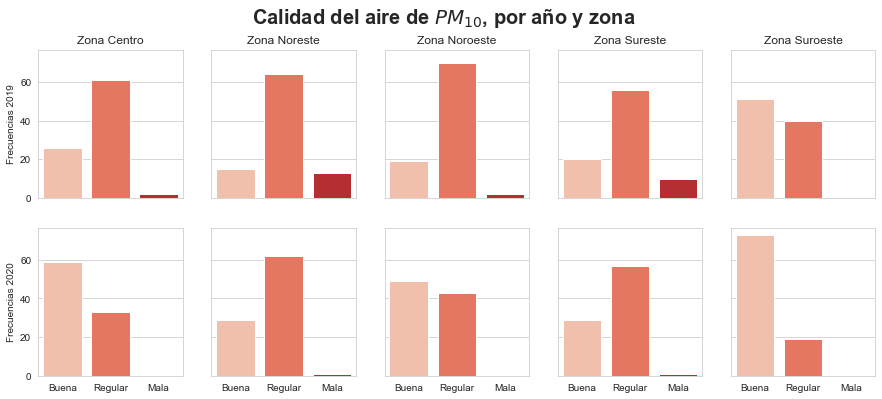

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

#2019
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2019,'CE'], ax=axes[0, 0], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2019,'NE'], ax=axes[0, 1], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2019,'NO'], ax=axes[0, 2], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2019,'SE'], ax=axes[0, 3], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2019,'SO'], ax=axes[0, 4], palette='Reds')
#2020
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2020,'CE'], ax=axes[1, 0], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2020,'NE'], ax=axes[1, 1], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2020,'NO'], ax=axes[1, 2], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2020,'SE'], ax=axes[1, 3], palette='Reds')
sns.barplot(x=crosstab_PM10.columns, y=crosstab_PM10.loc[2020,'SO'], ax=axes[1, 4], palette='Reds')

axes[0, 0].set(xlabel='', ylabel='Frecuencias 2019', title='Zona Centro')
axes[0, 1].set(xlabel='', ylabel='', title='Zona Noreste')
axes[0, 2].set(xlabel='', ylabel='', title='Zona Noroeste')
axes[0, 3].set(xlabel='', ylabel='', title='Zona Sureste')
axes[0, 4].set(xlabel='', ylabel='', title='Zona Suroeste')
axes[1, 0].set(xlabel='', ylabel='Frecuencias 2020', title='')
axes[1, 1].set(xlabel='', ylabel='', title='')
axes[1, 2].set(xlabel='', ylabel='', title='')
axes[1, 3].set(xlabel='', ylabel='', title='')
axes[1, 4].set(xlabel='', ylabel='', title='')
  
fig.suptitle('Calidad del aire de $PM_{10}$, por año y zona', fontsize=20, fontweight='bold');

Ya con nuestro comparativo de barras, podemos comprobar que en efecto en cada zona en el año 2020 se tuvo un incremento de la calidad `Buena` y un decremento de la calidad `Regular`. Además, las zonas con calidad `Mala` en el 2019 casi no aparecieron en nuestro segundo año.

## Análisis Multivariable $PM_{2.5}$

Para nuestro dataset de está partícula, podemos apreciar que las columnas que contienen variables categóricas son `Year`, `Month`, `Zona` y `Clase`.  
Con lo anterior, generamos una tabla de contingencia de 2 niveles en las `columnas` (Zona y Clase) y en las `filas` (Year y Month).

In [7]:
df_PM25.head()

,FECHA,Year,Month,Zona,PromDiario,Max,Min,Indice,Clase
0,2019-03-01,2019,3,CE,27.0,55.0,8.0,33.750,Buena
1,2019-03-01,2019,3,NE,32.2,62.0,1.0,40.250,Buena
2,2019-03-01,2019,3,NO,35.1,61.0,12.0,43.875,Buena
3,2019-03-01,2019,3,SE,24.4,47.0,6.0,30.500,Buena
4,2019-03-01,2019,3,SO,20.3,44.0,1.0,25.375,Buena


In [8]:
pd.crosstab([df_PM25['Year'], df_PM25['Month']], [df_PM25['Zona'], df_PM25['Clase']], margins=True, margins_name='total')

Zona           CE            NE            NO            SE            SO  \
Clase       Buena Regular Buena Regular Buena Regular Buena Regular Buena   
Year  Month                                                                 
2019  3        31       0    31       0    29       0    31       0    31   
      4        28       2    28       2    25       3    19      10    30   
      5        27       0    27       2    25       2    26       1    27   
2020  3        30       0    30       0    29       0    30       0    30   
      4        29       0    29       0    29       0    28       1    29   
      5        27       1    29       1    30       0    27       3    29   
total         172       3   174       5   167       5   161      15   176   

Zona                total  
Clase       Regular        
Year  Month                
2019  3           0   153  
      4           0   147  
      5           0   137  
2020  3           0   149  
      4           0   145  
      5           1   148  
total             1   879

Nuevamente al tener bastantes datos agrupados, es complicado poder analizar los datos de esta primera tabla de contingencia. Por tanto, generaremos una segunda tabla con 2 niveles en las filas (Año y Zona) y 1 en la columna (Clase).

In [9]:
crosstab_PM25 = pd.crosstab([df_PM25['Year'], df_PM25['Zona']], df_PM25['Clase'], margins=True, margins_name='Total')
crosstab_PM25 = crosstab_PM25.reindex(columns=['Buena','Regular'])
crosstab_PM25

Clase       Buena  Regular
Year  Zona                
2019  CE       86        2
      NE       86        4
      NO       79        5
      SE       76       11
      SO       88        0
2020  CE       86        1
      NE       88        1
      NO       88        0
      SE       85        4
      SO       88        1
Total         850       29

Con está nueva tabla de contingencia, apreciamos que los días con clase `Buena` se mantuvieron, y los de clase `Regular` disminuyeron en el 2020, comparado contra el 2019.  

Para un mejor análisis, vamos a realizar un comparativo de la calidad del aire por zona y año.

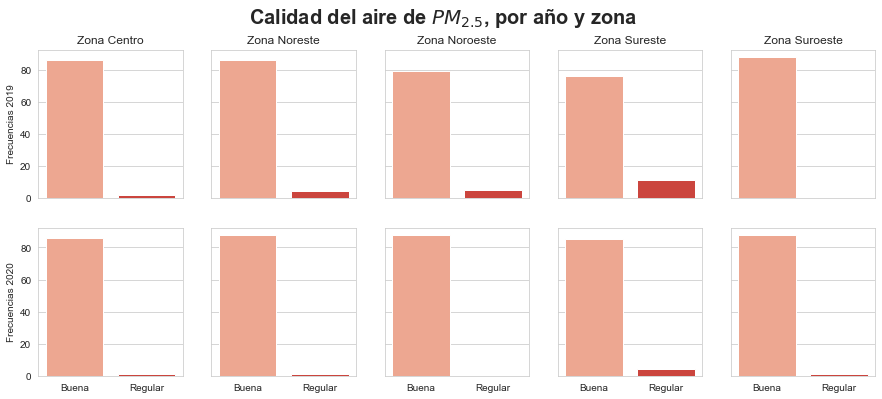

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

#2019
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2019,'CE'], ax=axes[0, 0], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2019,'NE'], ax=axes[0, 1], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2019,'NO'], ax=axes[0, 2], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2019,'SE'], ax=axes[0, 3], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2019,'SO'], ax=axes[0, 4], palette='Reds')
#2020
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2020,'CE'], ax=axes[1, 0], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2020,'NE'], ax=axes[1, 1], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2020,'NO'], ax=axes[1, 2], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2020,'SE'], ax=axes[1, 3], palette='Reds')
sns.barplot(x=crosstab_PM25.columns, y=crosstab_PM25.loc[2020,'SO'], ax=axes[1, 4], palette='Reds')

axes[0, 0].set(xlabel='', ylabel='Frecuencias 2019', title='Zona Centro')
axes[0, 1].set(xlabel='', ylabel='', title='Zona Noreste')
axes[0, 2].set(xlabel='', ylabel='', title='Zona Noroeste')
axes[0, 3].set(xlabel='', ylabel='', title='Zona Sureste')
axes[0, 4].set(xlabel='', ylabel='', title='Zona Suroeste')
axes[1, 0].set(xlabel='', ylabel='Frecuencias 2020', title='')
axes[1, 1].set(xlabel='', ylabel='', title='')
axes[1, 2].set(xlabel='', ylabel='', title='')
axes[1, 3].set(xlabel='', ylabel='', title='')
axes[1, 4].set(xlabel='', ylabel='', title='')
  
fig.suptitle('Calidad del aire de $PM_{2.5}$, por año y zona', fontsize=20, fontweight='bold');

En este comparativo de barras, podemos comprobar que en efecto en cada zona en el año 2020 se mantuvo la calidad `Buena` y un decremento de la calidad `Regular`. Además, no hay las zonas con calidad `Mala` en ambos años.